In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Cleaning text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

[nltk_data] Downloading package stopwords to C:\Users\Temor AL-
[nltk_data]     Kaisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
items = pd.read_csv("20191226-items.csv")
reviews = pd.read_csv("20191226-reviews.csv")

reviews['body'][0]
type(reviews)

pandas.core.frame.DataFrame

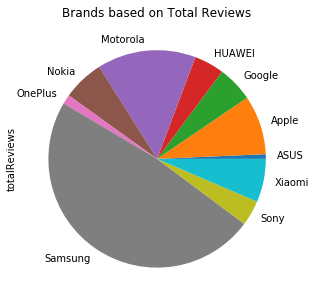

In [93]:
# Brand distribution
ax = items.groupby("brand").count()["totalReviews"].plot(kind="pie", 
                                                 figsize=(8, 5),
                                                 title="Brands based on Total Reviews")
plt.show()

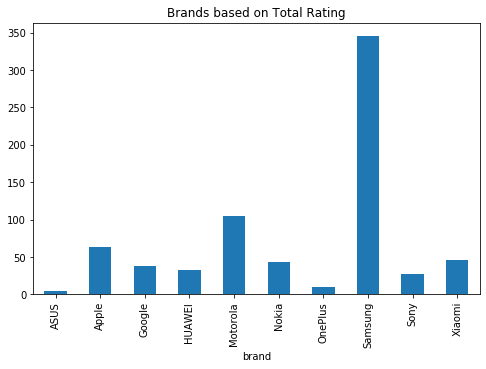

In [94]:
# Brand distribution
ax = items.groupby("brand").count()["rating"].plot(kind="bar", 
                                                 figsize=(8, 5),
                                                 title="Brands based on Total Rating")
plt.show()

In [95]:
# 0.4 Link review data to item data bsed on common column "asin"
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")
reviews.head()
print(reviews)

             asin               name  rating_x                date  verified  \
0      B0000SX2UC              Janet         3    October 11, 2005     False   
1      B0000SX2UC         Luke Wyatt         1     January 7, 2004     False   
2      B0000SX2UC             Brooke         5   December 30, 2003     False   
3      B0000SX2UC      amy m. teague         3      March 18, 2004     False   
4      B0000SX2UC      tristazbimmer         4     August 28, 2005     False   
...           ...                ...       ...                 ...       ...   
67981  B081H6STQQ              jande         5     August 16, 2019     False   
67982  B081H6STQQ            2cool4u         5  September 14, 2019     False   
67983  B081H6STQQ              simon         5       July 14, 2019     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak         5   December 24, 2019      True   
67985  B0825BB7SG      Owen Gonzalez         5   December 11, 2019     False   

                                       

In [96]:
# 0.5 Rename columns
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
#reviews["id"] = reviews.index + 1
reviews.head(15)

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
5,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
7,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0


In [97]:
# Check for any nulls values
reviews.isnull().sum()

asin                  0
name                  2
rating                0
date                  0
verified              0
title                14
body                 21
helpfulVotes      40771
brand               200
item_title            0
url                   0
image                 0
overall_rating        0
reviewUrl             0
totalReviews          0
price                 0
originalPrice         0
dtype: int64

In [98]:
reviews# Remove null values and unneeded features
reviews = reviews.dropna()
reviews = reviews.reset_index(drop=True)

In [99]:
# 2.2 Create brand subsets
apple = reviews[reviews["brand"]=="Apple"].sort_values(by=["date"], ascending=False)
apple.to_csv (r'apple_new.csv', index = False, header=True)


In [100]:
apple.dropna(inplace=True)
apple[reviews['rating'] != 3]
apple['Positivity'] = np.where(apple['rating'] > 3, 1, 0)
cols = ['asin', 'name', 'rating', 'date','verified', 'title', 'helpfulVotes', 'brand', 'item_title','url','image','overall_rating','reviewUrl','totalReviews','price','originalPrice']
apple.drop(cols, axis=1, inplace=True)
apple.head()

C:\Users\Temor AL-Kaisi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,body,Positivity
17809,Phone came with no sign of wear in great condi...,1
16854,I don’t want to buy it any more,0
12608,I love it! Works like new and exactly as descr...,1
12606,"Works perfect, easy to use with my cricket sim...",1
16598,"Absolutely new, just no earphones came in the box",1


In [101]:
# 0.5 Rename columns
apple.rename(columns={"body": "Review"}, inplace=True)

apple.head()
apple = apple.dropna(how='any',axis=0)


In [102]:
apple.head(10)

,Review,Positivity
17809,Phone came with no sign of wear in great condi...,1
16854,I don’t want to buy it any more,0
12608,I love it! Works like new and exactly as descr...,1
12606,"Works perfect, easy to use with my cricket sim...",1
16598,"Absolutely new, just no earphones came in the box",1
12255,Once it came it was packed and safe so the scr...,1
16665,The phone was great I was a little worried bec...,1
16730,The device has no apparent damage and battery ...,0
21941,El teléfono me llego en excelentes condiciones...,1
16754,The phone was in great condition and it works ...,1


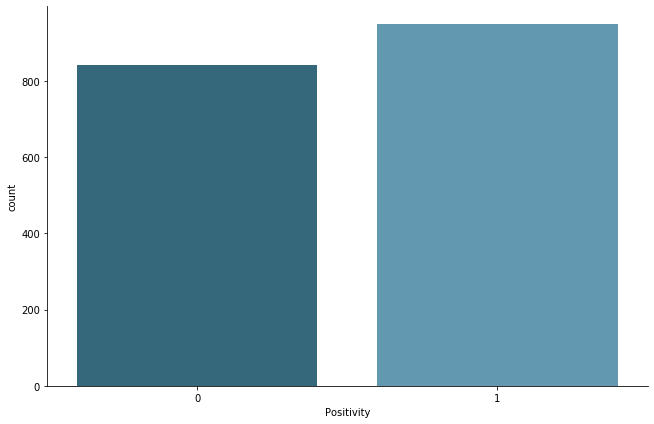

In [103]:
sns.catplot(x="Positivity", data=apple, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [104]:

# Creating a dataframe object from listoftuples
apple = pd.DataFrame(apple)

apple.to_csv (r'apple_new.csv', index = False, header=True)


In [105]:
df_apple = pd.read_csv("apple_new.csv")
print(df_apple)

print(df_apple['Review'][1])

                                                 Review  Positivity
0     Phone came with no sign of wear in great condi...           1
1                       I don’t want to buy it any more           0
2     I love it! Works like new and exactly as descr...           1
3     Works perfect, easy to use with my cricket sim...           1
4     Absolutely new, just no earphones came in the box           1
...                                                 ...         ...
1787  I ordered the Iphone 7 plus 128gb gold and got...           0
1788                         iPhone is wasn't unlocked.           0
1789  Much to my surprise this phone came completely...           1
1790  The phone did have scratches and a dent on it ...           0
1791  Quality refurbished phone. Looks and works lik...           1

[1792 rows x 2 columns]
I don’t want to buy it any more


In [106]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_apple['Review'], 20)
for word, freq in common_words:
    print(word, freq)
df_apple = pd.DataFrame(common_words, columns = ['Review' , 'count'])
df_apple.groupby('Review').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


the 4342
it 3020
and 2629
phone 2181
to 2064
is 1400
was 1331
this 1287
with 1079
on 900
in 876
my 873
not 854
of 851
for 794
but 781
that 776
new 605
iphone 580
no 562


# Cleaning Apple data

In [107]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = apple["Review"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
 # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)

[nltk_data] Downloading package wordnet to C:\Users\Temor AL-
[nltk_data]     Kaisi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [108]:
#Apply preprocess function to the dataframe
apple["Review"] = apple["Review"].astype("str")
apple["clean_text"] = apple["Review"].apply(clean_text)



cols = ['Review']
apple.drop(cols, axis=1, inplace=True)
apple.head()



# Re-order Columns
apple = apple[['clean_text','Positivity']]

apple.to_csv (r'apple_s.csv', index = False, header=True)
df_apples = pd.read_csv("apple_s.csv")


In [109]:
# 0.5 Rename columns
df_apples.rename(columns={"clean_text": "Review"}, inplace=True)

In [110]:
df_apples["Review"] = df_apples["Review"].astype("str")

In [111]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_apple['Review'], 20)
for word, freq in common_words:
    print(word, freq)
df_apple = pd.DataFrame(common_words, columns = ['Review' , 'count'])
df_apple.groupby('Review').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')


phone 1
new 1
iphone 1


In [112]:
apple

,clean_text,Positivity
17809,came sign wear condition look brand new 100 fu...,1
16854,don’t want buy,0
12608,love work like new exactly described come new ...,1
12606,work perfect easy use cricket sim card value l...,1
16598,absolutely new earphone came box,1
...,...,...
12382,ordered iphone 7 plus 128gb gold got exactly s...,0
11571,iphone unlocked,0
14739,much surprise came completely unlocked conditi...,1
12297,scratch dent tends overheat,0


In [133]:
# Step 2: Create a wordcloud
# 2.1 Define word frequency function
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love Greenwich university")

{'I': 1, 'love': 1, 'Greenwich': 1, 'university': 1}

In [114]:
# 2.3 Initializer
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

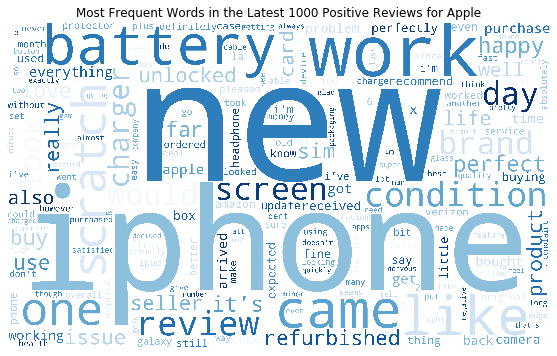

In [115]:
# 2.4 Plot wordclouds for latest 1000 reviews for Apple
apple_pos = " ".join(df_apples[df_apples["Positivity"]==1]["Review"][0:1000])
apple_pos_word_freq = word_freq_dict(apple_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(apple_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Apple")

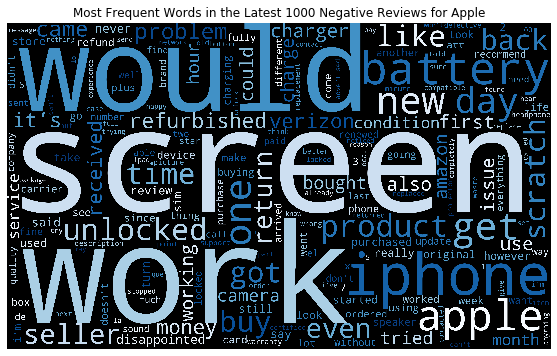

In [116]:
apple_neg = " ".join(df_apples[df_apples["Positivity"]== 0]["Review"][0:1000])
apple_neg_word_freq = word_freq_dict(apple_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="black")
wordcloud_from_frequency(apple_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Apple")

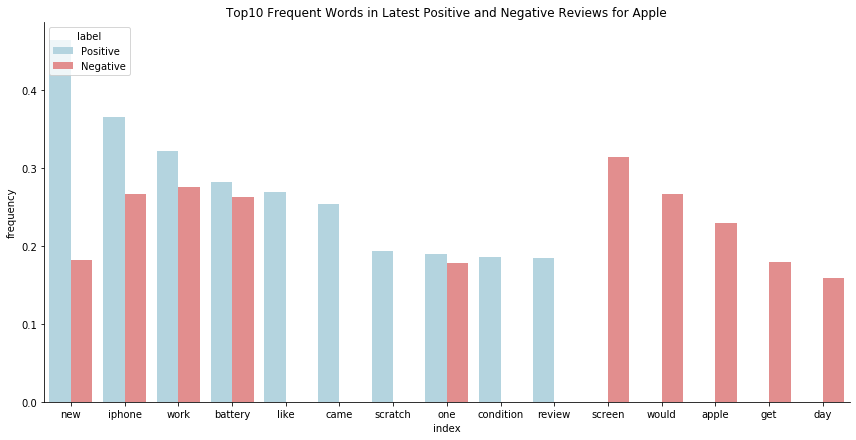

In [117]:
topn_wordfreq_bar_both(apple_pos_word_freq, apple_neg_word_freq, 
                       min(sum(df_apples["Positivity"]==1), 3000), 
                       min(sum(df_apples["Positivity"]==0), 3000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Apple", 
                       ["lightblue", "lightcoral"], 
                       height=6, aspect=2)


In [118]:
corpus = []
for i in range(0,1792):
    review = re.sub('[^a-zA-Z]', ' ',df_apples['Review'][i])
    review = review.lower()
    corpus.append(review)

In [119]:
corpus

['came sign wear condition look brand new     functional i ve problem far came temper glass well don t pre purchase one get however setting say overall battery maximum capacity dropped    since first purchased ther',
 'don t want buy',
 'love work like new exactly described come new charger cord box original apple box fine',
 'work perfect easy use cricket sim card value long battery life large size however',
 'absolutely new earphone came box',
 'came packed safe screen won t crack also look fact i m using right see top right bottom right corner little dot deep that s fine battery heath    expected     say renewed appreciate either way battery last almost whole day plenty enough time use school screen outstanding working perfectly put full protective screen case dropped original screen soft smooth scratch would recommend buying it s affordable lot gb came ct review company s see buy one',
 'little worried review received glass back completely intact   small scratch front barely even s

# Create the bag of words model for apple dataframe

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df_apples.iloc[:,1] 

#cv.fit_transform(corpus).todense() 
cv.vocabulary_ 

{'came': 514,
 'sign': 3417,
 'wear': 4172,
 'condition': 716,
 'look': 2123,
 'brand': 430,
 'new': 2399,
 'functional': 1491,
 've': 4079,
 'problem': 2830,
 'far': 1332,
 'temper': 3767,
 'glass': 1546,
 'well': 4185,
 'don': 1069,
 'pre': 2785,
 'purchase': 2894,
 'one': 2504,
 'get': 1531,
 'however': 1750,
 'setting': 3358,
 'say': 3257,
 'overall': 2562,
 'battery': 308,
 'maximum': 2223,
 'capacity': 524,
 'dropped': 1097,
 'since': 3436,
 'first': 1388,
 'purchased': 2895,
 'ther': 3806,
 'want': 4139,
 'buy': 487,
 'love': 2141,
 'work': 4237,
 'like': 2070,
 'exactly': 1251,
 'described': 957,
 'come': 657,
 'charger': 581,
 'cord': 775,
 'box': 425,
 'original': 2544,
 'apple': 177,
 'fine': 1378,
 'perfect': 2651,
 'easy': 1128,
 'use': 4054,
 'cricket': 822,
 'sim': 3428,
 'card': 527,
 'value': 4073,
 'long': 2118,
 'life': 2062,
 'large': 2011,
 'size': 3449,
 'absolutely': 6,
 'earphone': 1121,
 'packed': 2585,
 'safe': 3235,
 'screen': 3289,
 'won': 4230,
 'crack': 80

In [121]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

C:\Users\Temor AL-Kaisi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



[[148  25]
 [ 35 151]]


In [122]:
(148 + 151)/358

0.835195530726257

Text(0.5, 257.44, 'Predicted label')

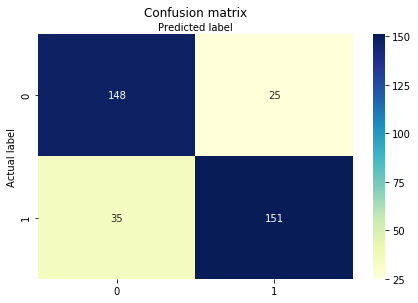

In [123]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
ax.set_ylim(2, 0)
plt.xlabel('Predicted label')

In [124]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8328690807799443
Precision: 0.8579545454545454
Recall: 0.8118279569892473


In [125]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[144  29]
 [ 35 151]]


In [126]:
(144 + 151)/358

0.8240223463687151

Text(0.5, 257.44, 'Predicted label')

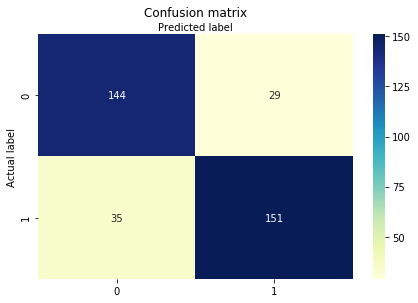

In [127]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
ax.set_ylim(2, 0)
plt.xlabel('Predicted label')

In [128]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8217270194986073
Precision: 0.8388888888888889
Recall: 0.8118279569892473


In [129]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[130  43]
 [ 28 158]]


In [130]:
(130 + 158)/358

0.8044692737430168

Text(0.5, 257.44, 'Predicted label')

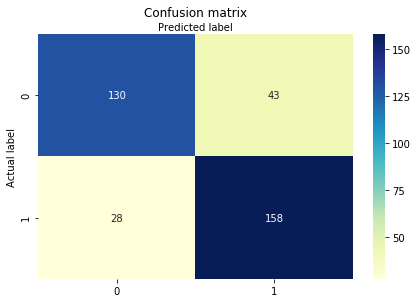

In [131]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
ax.set_ylim(2, 0)
plt.xlabel('Predicted label')

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8022284122562674
Precision: 0.7860696517412935
Recall: 0.8494623655913979
